In [26]:
%matplotlib widget
%reload_ext autoreload
%autoreload 2

from pathlib import Path
import typing as t

import numpy
from numpy.typing import ArrayLike, NDArray
import tifffile
from matplotlib import pyplot

from phaser.utils.num import fft2, ifft2, get_array_module

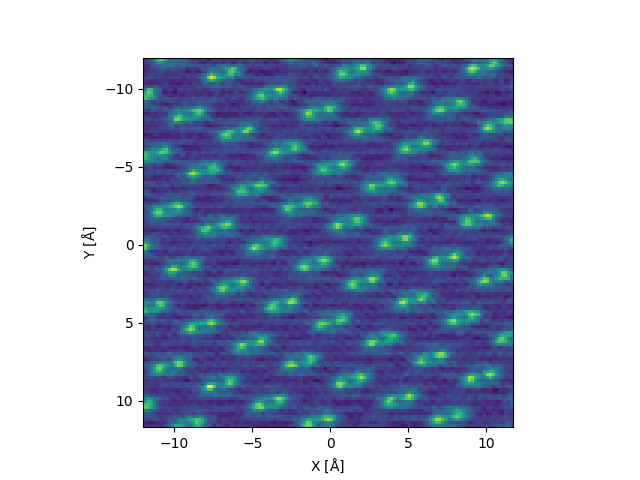

In [108]:
from phaser.state import PartialReconsState
from phaser.utils.misc import unwrap
from phaser.utils.plotting import plot_object_phase

state_path = Path("../si_grad/iter90.h5")

state = PartialReconsState.read_hdf5(state_path)
object_state = unwrap(state.object)
object_sampling = object_state.sampling

with tifffile.TiffFile("ground_truth_Si_300kV.tif") as f:
    ground_truth = f.asarray()
    ground_truth_sampling: NDArray[numpy.float64] = numpy.array(f.shaped_metadata[0]['spacing'])  # type: ignore

plot_object_phase(object_state);

max_shift: 165.791 px (7.461 angstrom)
RMS error: 0.012004131242717932


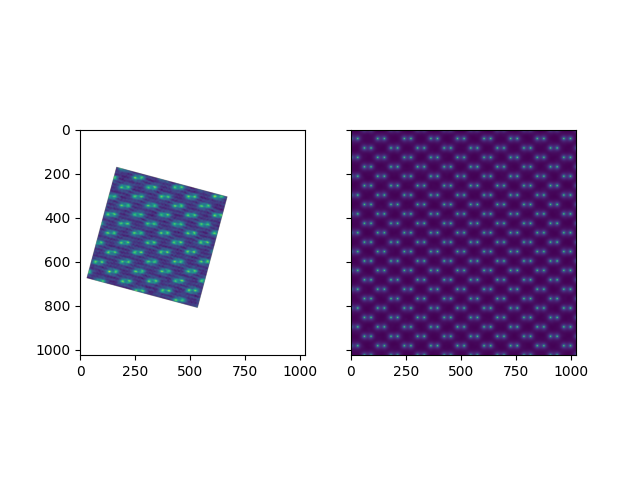

In [113]:
from phaser.utils.analysis import align_object_to_ground_truth

xp = get_array_module(object_state.data)
ground_truth = xp.array(ground_truth)

upsamp_obj = align_object_to_ground_truth(object_state, ground_truth, ground_truth_sampling, rotation_angle=-15.0)

error = numpy.sqrt(sum(
    float(numpy.nanmean((slice - ground_truth)**2))
    for slice in upsamp_obj
) / upsamp_obj.shape[0])

print(f"RMS error: {error}")

fig, axs = pyplot.subplots(ncols=2, sharex=True, sharey=True)
axs[0].imshow(numpy.mean(upsamp_obj, axis=0))
axs[1].imshow(ground_truth)
pyplot.show()